# 1. Introducción al Problema de ordenamiento

**Entrada**: Una secuencia de n números $[a_1,a_2,...,a_n]$

**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, tal que $a_1'\leq a_2' \leq... \leq a_n'$.

Similar al BubbleSort, otro algoritmo de ordenamiento simple que ha sido analizado desde inicios de la computación es el InsertionSort. Aunque este tenga un uso limitado debido a su simplicidad, esta misma simplicidad de implementación lo hace una buena opción fácil de implementar.



# 2. InsertionSort

El siguiente código muestra una implementación del algoritmo **InsertionSort**.

## 2.1. Código

In [1]:
import random
from termcolor import colored
import copy


def insertionSort(a, verbose=False):
    comps = 0
    movs = 0
    chk = False
    for i in range(1, len(a)):
        if verbose == True: 
            print("\nIndice actual", i)
            if (i < len(a)-1): print(str(a[:i])[1:-1],",",colored(f"{str(a[i:i+1])[1:-1]}","red"),",",str(a[i+1:])[1:-1])
            else: print(str(a[:i])[1:-1],",",colored(f"{str(a[i:i+1])[1:-1]}","red"))

        pos = a[i] # Variable que guarda el indice a mover
        j = i-1

        while j >= 0 and pos < a[j]:
            if verbose == True: print("\nIndice anterior menor al actual.\nMoviendo posicion a indice", j)
            if chk == False: 
                movs += i
                chk = True
            comps += 1 # Esto cuenta como una comparacion
            a[j+1] = a[j] # Se cambia el valor del indice actual por el anterior a este
            j -= 1 # Se baja un indice
            if verbose == True: print(a)
        chk = False
        a[j+1] = pos # El indice previamente guardado se vuelve a introducir al arreglo

        if verbose == True: 
            print("\nDespues de la pasada:")
            print(a)
            print("\n")
    if verbose == True:
        print("Movimientos =", movs)
        print("Retrocesos Promedio =", (movs/comps))
    return a, comps

a = [26, 16, 21, 38, 22]
print("Entrada: ", a)
a, comps = insertionSort(a)
print("Salida: ", a)
print("# comparaciones: ", comps)

Entrada:  [26, 16, 21, 38, 22]
Salida:  [16, 21, 22, 26, 38]
# comparaciones:  4


## 2.2. Descripción del algoritmo

El algoritmo recibe como entrada una lista (o arreglo) $a$ con la secuencia de $n$ elementos que queremos ordenar. Luego, los números se ordenan dentro de la misma lista.

1. En cada iteración $i$, el algoritmo recorre el arreglo comparando cada elemento `a[i]`(variable `pos`) con el elemento `a[i-1]`(variable `j` interpretada como `a[j]`). Si `pos < a[j]`, entonces los elementos se intercambian de posiciones y se reduce el valor de j por 1, esto se repite hasta que no hayan números menores detrás del valor que esta siendo movido, y se reinserta el indice inicial en su posicion debida `a[j+1]`. Si no se cumple `pos < a[j]`, eso quiere decir que el arreglo esta ordenado hasta `pos` y no se hace ningun cambio.

2. Repetir Paso 1 hasta llegar al final del arreglo.

3. Al final, se retorna el arreglo ordenado y un contador de comparaciones: `comps`.

InsertionSort recorre todo el arreglo indice por indice, pausando y retrocediendo en el arreglo ya recorrido para ir ordenando, como se muestra en la siguiente animacion:

![image](https://upload.wikimedia.org/wikipedia/commons/0/0f/Insertion-sort-example-300px.gif)

Cuando la variable `verbose` es `True` se muestra información para ver lo que pasa paso a paso dentro de la función.

## 2.3. Ejemplo

Por ejemplo, tenemos un arreglo:

$a=[5,3,2,4]$

En la primera pasada intercambiamos el 5 por el 3:

$a=[3,5,2,4]$

Luego, en la segunda pasada se intercambian el 2 con el 5, e inmediatamente después el 2 con el 3:

$a=[3,2,5,4]$

$a=[2,3,5,4]$

Y en la tercera pasada se cambian el 4 con el 5:

$a=[2,3,4,5]$

Y ya tenemos el arreglo ordenado.

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [2]:
a = random.sample(range(1, 100), 5)
insertionSort(a,verbose=True)


Indice actual 1
19 , 39 , 61, 8, 70

Despues de la pasada:
[19, 39, 61, 8, 70]



Indice actual 2
19, 39 , 61 , 8, 70

Despues de la pasada:
[19, 39, 61, 8, 70]



Indice actual 3
19, 39, 61 , 8 , 70

Indice anterior menor al actual.
Moviendo posicion a indice 2
[19, 39, 61, 61, 70]

Indice anterior menor al actual.
Moviendo posicion a indice 1
[19, 39, 39, 61, 70]

Indice anterior menor al actual.
Moviendo posicion a indice 0
[19, 19, 39, 61, 70]

Despues de la pasada:
[8, 19, 39, 61, 70]



Indice actual 4
8, 19, 39, 61 , 70

Despues de la pasada:
[8, 19, 39, 61, 70]


Movimientos = 3
Retrocesos Promedio = 1.0


([8, 19, 39, 61, 70], 3)

En cada iteración (pasada) se recorre e intercambian elementos en rojo.

Note que al finalizar cada pasada, un nuevo elemento queda ordenado al final del arreglo (elementos en azul).





# 3. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

*El **InsertionSort** tiene un **tiempo de ejecución de** $O(n^2)$ en el peor caso, y $O(n)$ en el mejor caso.*

## Prueba del teorema

Echándole un vistazo al código, podemos ver que este peor caso se daría si el arreglo estuviera ordenado de mayor a menor. Ya que por cada indice recorrido, el algoritmo debe retroceder todo lo recorrido y cambiarlo de a uno en uno para ordenarlo.

### Ejemplo

In [3]:
a =[5,4,3,2,1];
print("Entrada no ordenada:",a)
a,counter=insertionSort(a,True)
print("Salida ordenada:",a)
print("Total de comparaciones realizadas:",counter)

Entrada no ordenada: [5, 4, 3, 2, 1]

Indice actual 1
5 , 4 , 3, 2, 1

Indice anterior menor al actual.
Moviendo posicion a indice 0
[5, 5, 3, 2, 1]

Despues de la pasada:
[4, 5, 3, 2, 1]



Indice actual 2
4, 5 , 3 , 2, 1

Indice anterior menor al actual.
Moviendo posicion a indice 1
[4, 5, 5, 2, 1]

Indice anterior menor al actual.
Moviendo posicion a indice 0
[4, 4, 5, 2, 1]

Despues de la pasada:
[3, 4, 5, 2, 1]



Indice actual 3
3, 4, 5 , 2 , 1

Indice anterior menor al actual.
Moviendo posicion a indice 2
[3, 4, 5, 5, 1]

Indice anterior menor al actual.
Moviendo posicion a indice 1
[3, 4, 4, 5, 1]

Indice anterior menor al actual.
Moviendo posicion a indice 0
[3, 3, 4, 5, 1]

Despues de la pasada:
[2, 3, 4, 5, 1]



Indice actual 4
2, 3, 4, 5 , 1

Indice anterior menor al actual.
Moviendo posicion a indice 3
[2, 3, 4, 5, 5]

Indice anterior menor al actual.
Moviendo posicion a indice 2
[2, 3, 4, 4, 5]

Indice anterior menor al actual.
Moviendo posicion a indice 1
[2, 3, 3, 4, 5

En este caso, la primera pasada hizo 1 comparacion, la segunda 2, la tercera 3 y la cuarta 4, para un total de 10 comparaciones.

En el caso general, se deberían realizar $\sum\limits_{i=0}^{n-1} i=\frac{n(n-1)}{2}$ comparaciones. Por lo que el **tiempo de ejecución del algoritmo en el peor caso** es $O(n^2)$.

# 4. Correctitud

### **Teorema (Correctitud).**

*El algoritmo **InsertionSort** genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir,* $a_1'\leq a_2' \leq... \leq a_n'$.


## Prueba del Teorema

Previamente observamos que en cada iteración de InsertionSort agregamos un nuevo elemento ordenado al inicio del arreglo.

Por lo tanto probaremos la siguiente **propiedad invariante de bucle** para el `InsertionSort`:

> Al comienzo de cada iteración $i$ del bucle más grande, los primeros $i-1$ elementos del arreglo corresponden a los menores elementos del arreglo original ordenados de menor a mayor.

**Inicialización**

Al comienzo de la primera iteración (i=1), los primeros $i-1=0$ elementos del arreglo cumplen la propiedad. Esto es trivialmente cierto.

**Mantención**

Al comienzo de cada iteracion $i$ los elementos desde $0$ a $i-1$ del arreglo de encuentran ordenados de menor a mayor.

Consideremos que $x$ como el menor elemento no ordenado del arreglo (como se muestra en la figura)

![image](https://i.imgur.com/oyNqHf4.png)

Durante el recorrido del InsertionSort, $x$ se irá intercambiando con los anteriores elementos (ya que son mayores) hasta llegar justo a la posicion correcta:

![image](https://i.imgur.com/QPjw8vG.png)


Al finalizar la iteración (y al comienzo de la siguiente), se seguirá cumpliendo la **propiedad invariante**.

![image](https://i.imgur.com/ae3wj3v.png)


**Correctitud**

Finalmente, como la propiedad de bucle invariante es verdadera al incio del bucle y se mantiene en cada iteración, podemos decir que al **finalizar la n-ésima iteración del algoritmo**, se que genera un arreglo con los mismos elementos del arreglo de entrada ordenados de menor a mayor.

# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* cantidad de comparaciones del peor caso calculadas matemáticamente,
* cantidad de comparaciones del mejor caso calculadas matemáticamente (n-1 comparaciones si el arreglo está ordenado)
* cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para tamaños de problemas con $n \in [5,100]$.

Los arreglos de entrada son generados aleatoriamente haciendo un sampling de un conjunto de números entre 1 y 100.

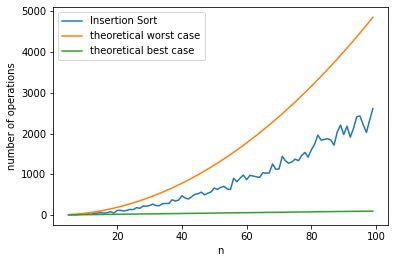

In [4]:
import matplotlib.pyplot as plt

x=[n for n in range(5,100)] 
y1=[n*(n-1)/2 for n in range(5,100)] # worst case
y2=[n-1 for n in range(5,100)] # best case
y=[]; 

for n in range(5,100):
  a = random.sample(range(1, 100), n)
  a,counter = insertionSort(a)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Insertion Sort", "theoretical worst case", "theoretical best case"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

### Análisis de resultados

En el gráfico se puede apreciar que, como cabía de esperar, el tiempo de ejecución empírico esta por debajo del peor caso teórico.

Por otro lado, el mejor caso tiene cota asintótica $\Omega(n)$, sin embargo, para arreglos generados aleatoriamente está muy lejos de los resultados experimentales.

## 5.2. Tiempo de ejecución (experimental)

En el siguiente gráfico se reporta el tiempo de ejecución del algoritmo **InsertionSort** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $500$, y se compara al mismo tiempo del algoritmo **BubbleSort**.



In [5]:
import random
from termcolor import colored
import copy

def bubble_sort(a, verbose=False):
    n = len(a)
    T = 0 #contador de comparaciones

    if verbose == True: print("input array:",a)

    for i in range(1,n+1):
        if verbose == True: print("\nPasada",i)
        # Flag que indica si el arreglo ya se encuentra ordenado
        already_sorted = True

        # Se recorre el arreglo
        for j in range(n - i):
            T +=1
            if a[j] > a[j + 1]:
                # Si el elemento es mayor al siguiente se intercambia
                a[j], a[j + 1] = a[j + 1], a[j]
                if verbose == True: 
                  print(str(a[:j])[1:-1],",",colored(f"{str(a[j:j+2])[1:-1]}","red"),",",str(a[j+2:])[1:-1])

                already_sorted = False

        if already_sorted == False and verbose == True: 
           print("\nAl finalizar pasada:")
           print(str(a[:n-i])[1:-1],",",colored(f"{str(a[n-i:])[1:-1]}","blue"))

        if already_sorted:
            if verbose == True: print("is sorted!")
            break

    if verbose == True: print("\noutput array:",a)

    return a, T

# Ejemplo
A = [5,8,7,1,3]
print("Entrada: ",A)
A, counter = bubble_sort(A)
print("Salida: ",A)
print("# comparaciones: ", counter)

Entrada:  [5, 8, 7, 1, 3]
Salida:  [1, 3, 5, 7, 8]
# comparaciones:  10


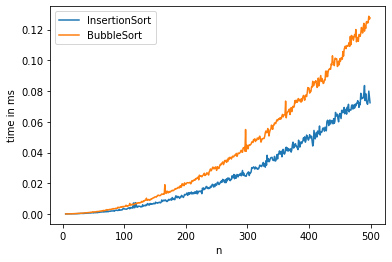

In [7]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({a})", repeat=1, number=10)
  x.append(n)
  y.append(t)

plt.plot(x,y)

x=[]; y=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import bubble_sort", stmt=f"bubble_sort({a})", repeat=1, number=10)
  x.append(n)
  y.append(t)

plt.plot(x,y)
plt.legend(["InsertionSort", "BubbleSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

En el gráfico se puede apreciar que el InsertionSort es más rápido que el BubbleSort, mostrando una mayor diferencia de tiempo mientras más largo sea el arreglo a ordenar.

Note que hay unos peaks de tiempo. Estos se deben probablemente al comportamiento impredecible de los procesadores y quizás a otros procesos que también lo están ocupando.